In [ ]:
import random
import sys

import matplotlib.pyplot as plt
from scipy.special import erfc

import Utils as utils
import NeuralNetworkCorrection as network
import numpy as np

In [ ]:
# Gerar dados de treinamento
word_length = 2 ** 2 # Tamanho padrão da entrada do hamming
noise_rates = np.linspace(0.01, 0.2, 100)
sample_length = 10 ** 3
epoches = 50
Eb_dB_values = np.arange(-2, 11, 1)
noisy_data = []
original_data = []

for eb_db in Eb_dB_values:
    corrompida, original = network.generate_data_for_training(1, sample_length, eb_db)
    noisy_data.append(corrompida)
    original_data.append(original)

In [ ]:
# Criar e treinar a rede neural
model = network.train_neural_network(noisy_data, original_data, epoches, word_length)

In [ ]:
# Gerar dados de teste
amostras_ruidosas = []
amostras_originais = []
for eb_db in Eb_dB_values:
    ruidosa, original = network.generate_data_for_training(1, 10**4, eb_db)
    amostras_originais.append(original)
    amostras_ruidosas.append(ruidosa)


In [ ]:
# Decodificar e corrigir os bits usando a rede neural
amostras_decodificadas = []
#for amostra_ruidosa in amostras_ruidosas:
 #   amostras_decodificadas.append(network.decode_and_correct(amostra_ruidosa, model))

In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[0], model))

In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[1], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[2], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[3], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[4], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[5], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[6], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[7], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[8], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[9], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[10], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[11], model))


In [ ]:
amostras_decodificadas.append(network.decode_and_correct(amostras_ruidosas[12], model))


In [ ]:
bers = []
for i in range(0, len(amostras_decodificadas)):
    bers.append(np.sum(np.array(amostras_decodificadas[i]).astype(int) != amostras_originais[i]) / len(amostras_originais[i]))


In [ ]:
# Calcular a BER teórica
Eb_values = 10**(Eb_dB_values / 10)
BER_teorica = 0.5 * erfc(np.sqrt(Eb_values))

# Plotar as taxas de erro de bit simuladas e teóricas
plt.figure(figsize=(10, 6))
plt.semilogy(Eb_dB_values, bers, linestyle = '--', label='BER Simulada')
plt.semilogy(Eb_dB_values, BER_teorica, linestyle='--', label='BER Teórica')
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.grid(True, which='both')
plt.legend()
plt.title('BER Simulada vs BER Teórica')
plt.show()

In [ ]:
print(model.summary())

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

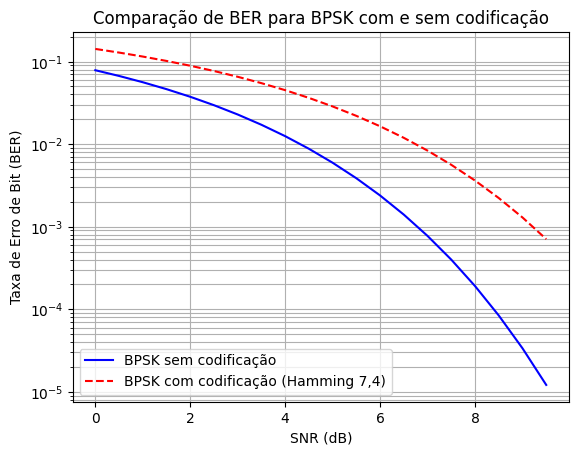

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
# Função de cálculo da BER para BPSK sem codificação
def ber_bpsk(snr):
    return 0.5 * erfc(np.sqrt(snr))

# Função de cálculo da BER para BPSK com codificação (simplificação)
def ber_coded_bpsk(snr, code_rate):
    snr_adjusted = snr * code_rate
    return 0.5 * erfc(np.sqrt(snr_adjusted))

# SNR em dB
snr_db = np.arange(0, 10, 0.5)

# Convertendo SNR de dB para linear
snr_linear = 10 ** (snr_db / 10)

# Taxa de codificação, por exemplo, para um código Hamming (7,4)
code_rate = 4 / 7

# Calculando BER
ber_uncoded = ber_bpsk(snr_linear)
ber_coded = ber_coded_bpsk(snr_linear, code_rate)

# Plotando as curvas BER
plt.figure()
plt.semilogy(snr_db, ber_uncoded, 'b-', label='BPSK sem codificação')
plt.semilogy(snr_db, ber_coded, 'r--', label='BPSK com codificação (Hamming 7,4)')
plt.xlabel('SNR (dB)')
plt.ylabel('Taxa de Erro de Bit (BER)')
plt.title('Comparação de BER para BPSK com e sem codificação')
plt.legend()
plt.grid(True, which='both')
plt.show()
